In [1]:
from preamble import *
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

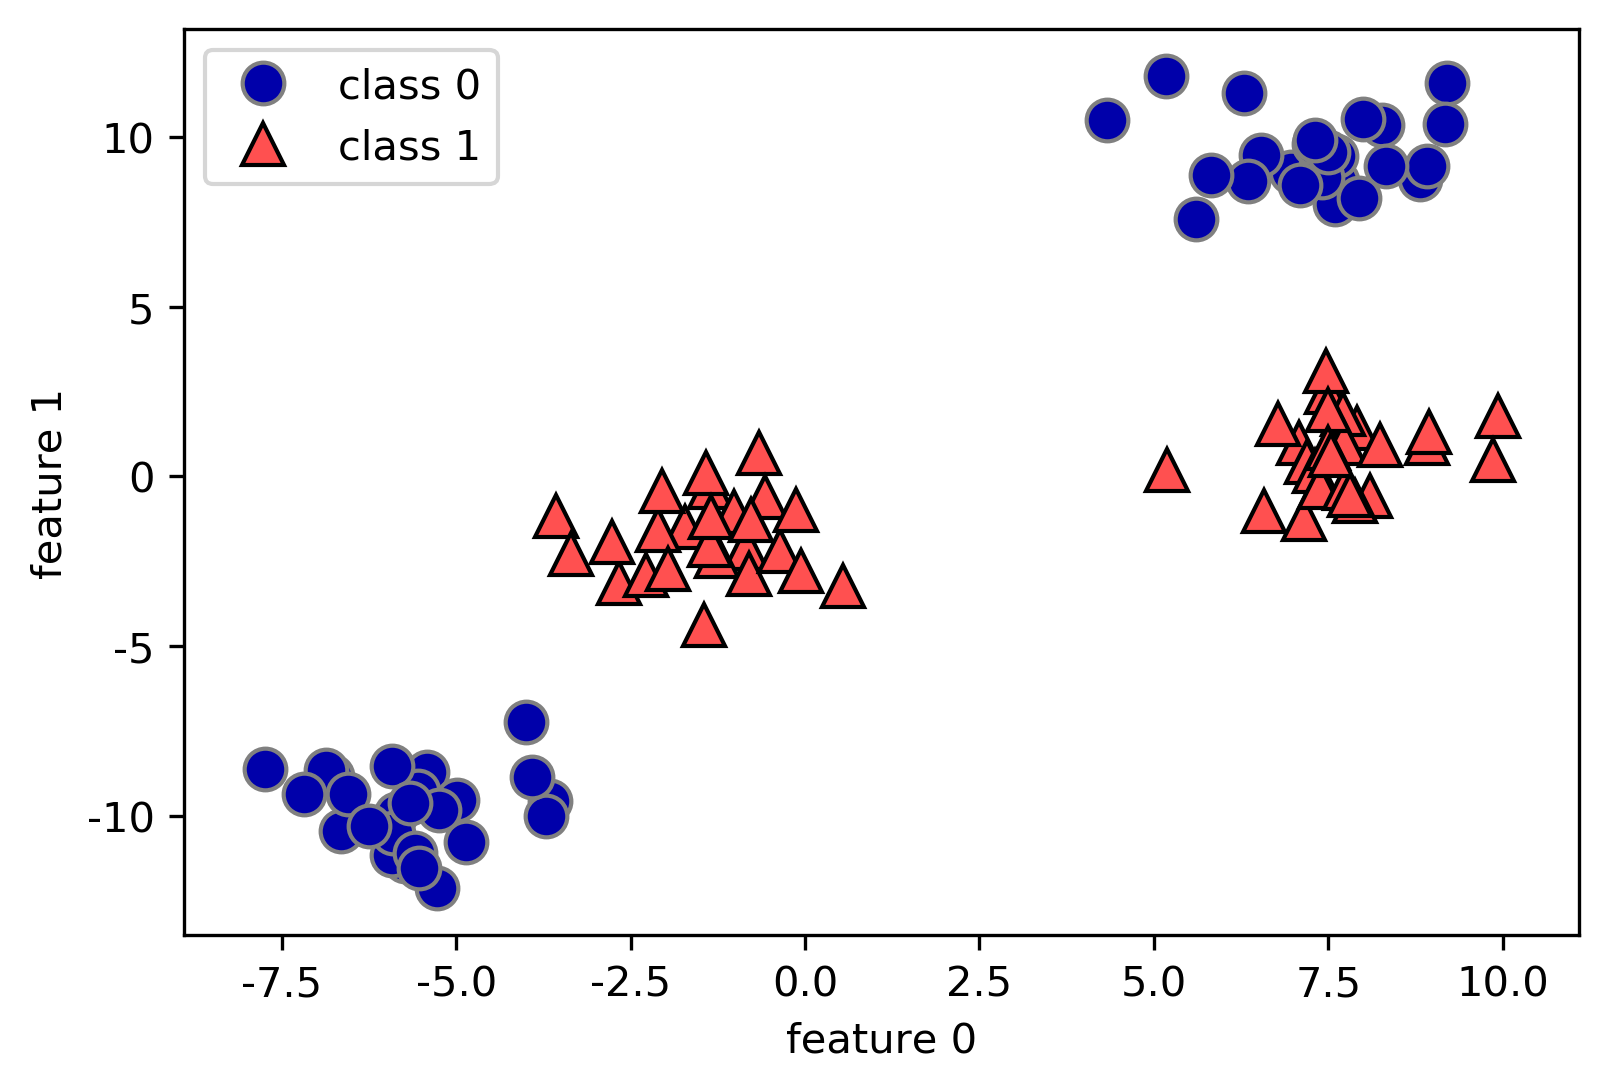

In [5]:
x, y = make_blobs(centers=4, random_state=8) #데이터 생성

y = y % 2
mglearn.discrete_scatter(x[:,0], x[:,1], y) #분산
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1"])

E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

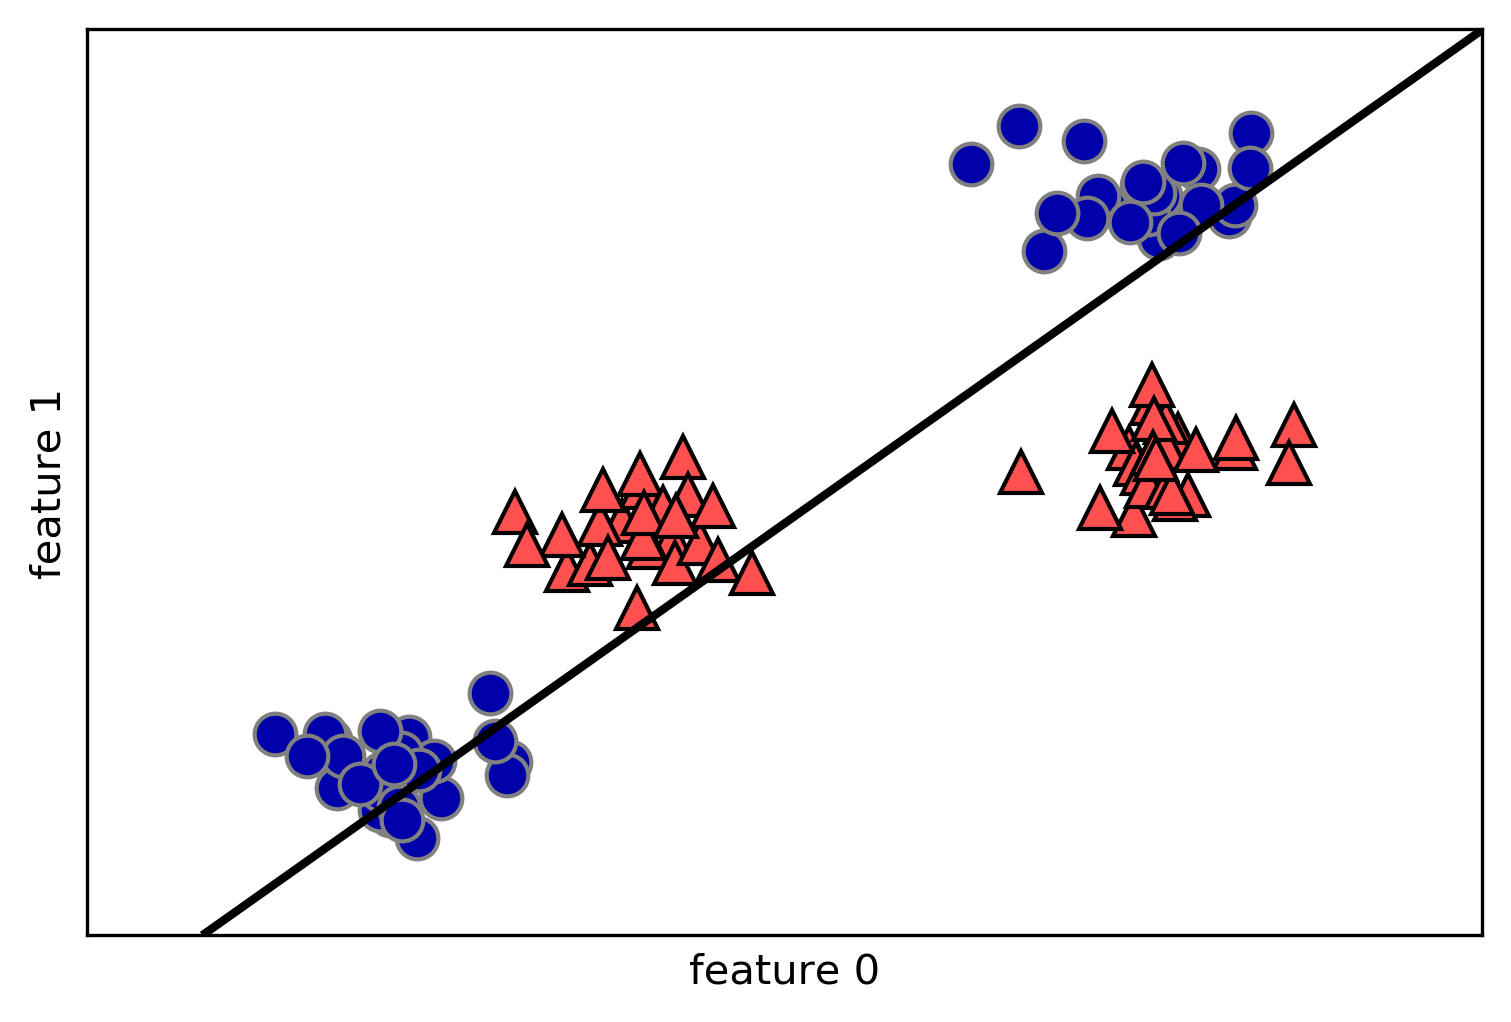

In [5]:
linear_svm = LinearSVC().fit(x,y)

mglearn.plots.plot_2d_separator(linear_svm, x) #선형 dicision binary를 그려줌
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

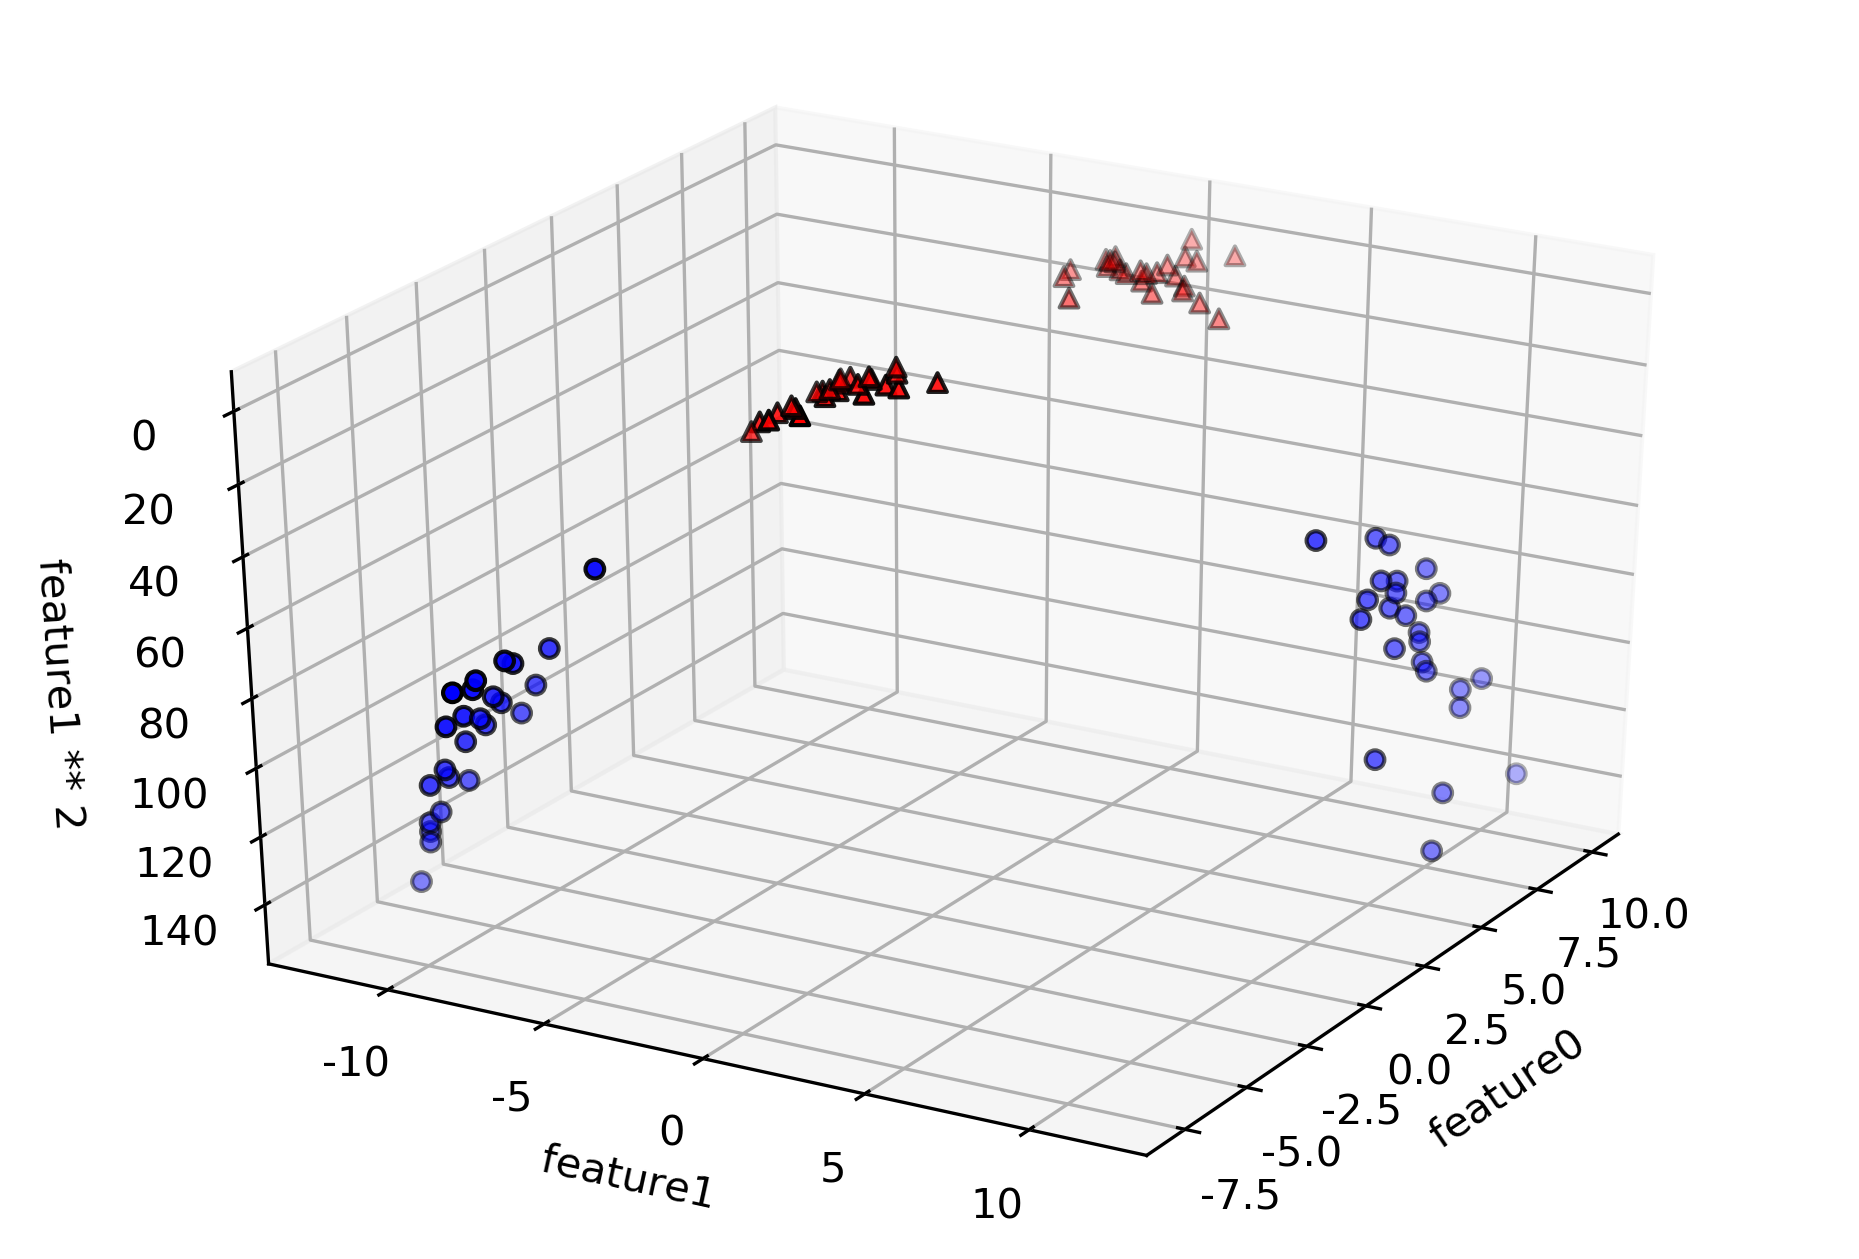

In [7]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

#두 번째 특성을 제곱하여 추가합니다.
# x를 제곱해서 붙였다. 3차원으로 늘린것이다.
xnew = np.hstack([x, x[:,1:] ** 2])

figure = plt.figure()

#3 차원 그래프
ax = Axes3D(figure, elev=-150, azim=-30)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다.
mask = y == 0
ax.scatter(xnew[mask, 0], xnew[mask, 1], xnew[mask, 2], c='b', edgecolor='k')
ax.scatter(xnew[~mask, 0], xnew[~mask, 1], xnew[~mask,2], c ='r', marker='^', edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
plt.show()


E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

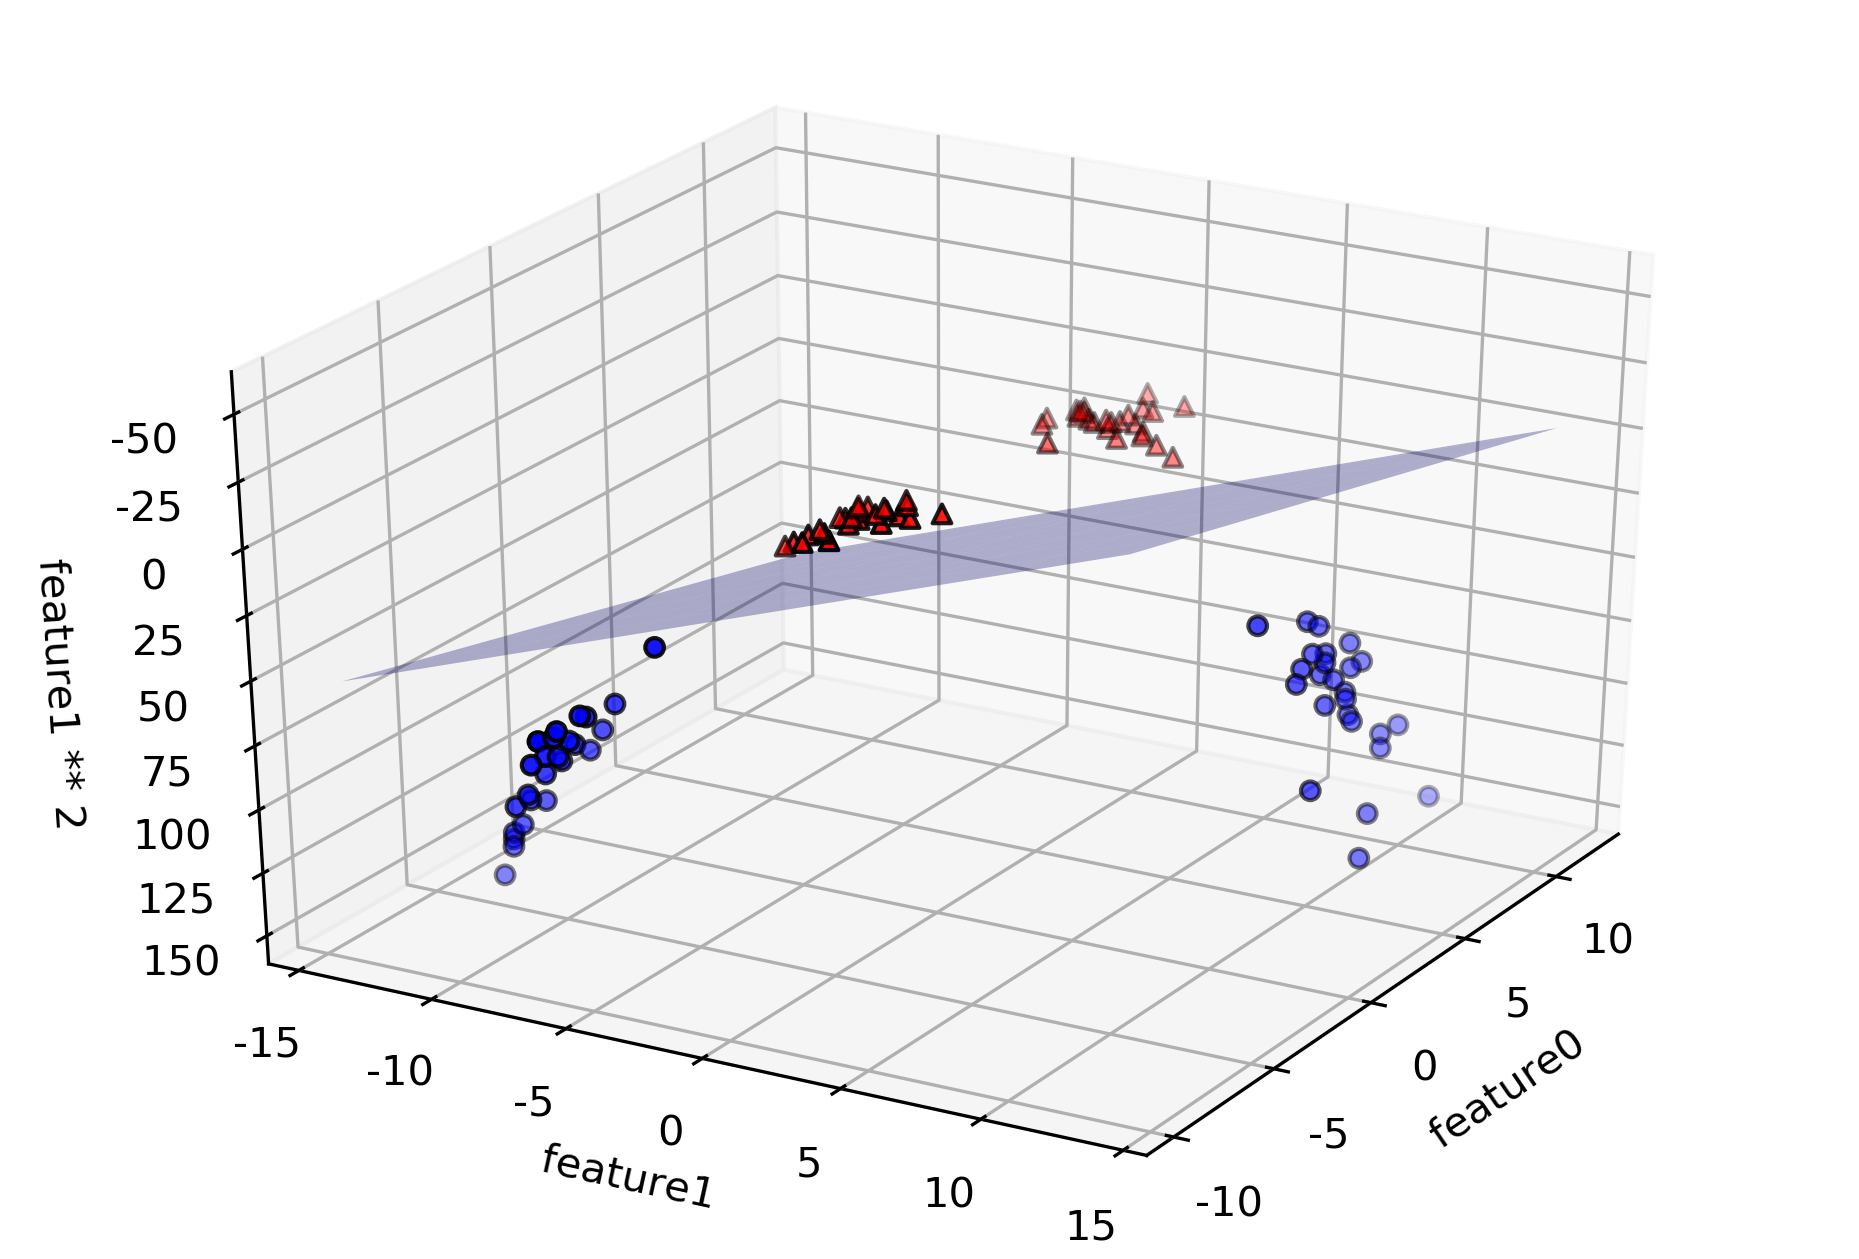

In [9]:
linear_svm_3d = LinearSVC().fit(xnew, y)
#이 두개를 사용해서 평면이 구해진다.
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

#선형 결정 결계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-150, azim=-30)
xx = np.linspace(xnew[:,0].min() - 2, xnew[:,0].max() + 2, 50)
yy = np.linspace(xnew[:,1].min() - 2, xnew[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx,yy) #3차원 격자를 그리게 된다.
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY , ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(xnew[mask, 0], xnew[mask,1], xnew[mask,2],c ='b', edgecolor='k')
ax.scatter(xnew[~mask, 0], xnew[~mask,1], xnew[~mask,2],c ='r',marker="^" ,edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")